# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


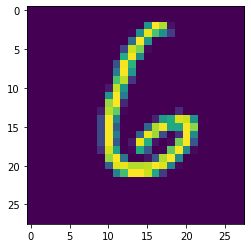

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[32])

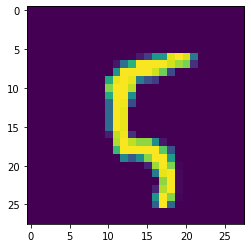

In [5]:
%matplotlib inline
plt.imshow(X_train[100])

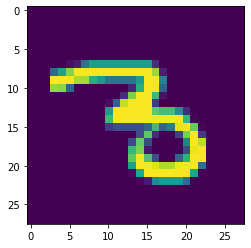

In [6]:
%matplotlib inline
plt.imshow(X_train[30])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
#shuffle the data 
indexes = np.random.permutation(len(Y_train))
X_train = X_train[indexes]
Y_train = Y_train[indexes]

In [0]:
#create valid and train split
split = int(0.9 * len(Y_train))
X_val = X_train[split:]
Y_val = Y_train[split:]
X_train = X_train[:split]
Y_train = Y_train[:split]

In [14]:
len(Y_val)

6000

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(32, kernel_size=(1, 1), activation='relu'))
# model.add(Convolution2D(10, kernel_size=(12, 12), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 5, 5, 32)          2080      
_________________________________________________________________
flatten_4 (Flatten)          (None, 800)              

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [77]:
# First run for 10 epochs and then run 1 epoch in manually to get the best model.
model.fit( X_train, Y_train, batch_size=128, nb_epoch=1, verbose=1,validation_data=(X_val, Y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
 1664/54000 [..............................] - ETA: 5s - loss: 0.0102 - acc: 0.9952

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


54000/54000 [==============================] - 6s 113us/step - loss: 0.0090 - acc: 0.9968 - val_loss: 0.0426 - val_acc: 0.9895


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [79]:
print(score)

[0.032263540528796875, 0.9913]


In [0]:
y_pred = model.predict(X_test)

In [81]:
print(y_pred[:9])
print(y_test[:9])

[[1.9137671e-13 1.0048546e-11 1.2578628e-11 3.2106413e-09 3.7782118e-14
  1.1693655e-12 2.3100169e-20 1.0000000e+00 4.0390746e-14 3.6507796e-08]
 [1.0923389e-16 6.8816586e-15 1.0000000e+00 1.6851543e-17 3.2193928e-16
  9.9652349e-23 2.5474183e-17 1.4067121e-15 2.5637376e-17 1.7089070e-12]
 [3.2155810e-08 9.9998426e-01 2.6379745e-09 3.8123016e-12 3.7243703e-06
  5.7621627e-09 1.8510841e-08 1.1268172e-05 6.6055213e-07 5.4834985e-08]
 [9.9999940e-01 1.1221277e-14 6.2767256e-08 1.3197162e-09 1.7040742e-10
  7.7878745e-11 4.9572384e-07 8.7568765e-11 1.7133300e-10 6.7417882e-10]
 [6.0203856e-11 1.1929308e-11 1.1734046e-10 1.2775208e-11 9.9999094e-01
  5.2253767e-11 2.2794653e-11 2.3052586e-10 2.7649139e-07 8.8013076e-06]
 [4.2251593e-09 9.9998724e-01 5.3004517e-11 1.9020425e-14 3.5111185e-07
  4.9628444e-11 1.9742197e-10 1.2276806e-05 4.5958096e-08 4.0789995e-08]
 [2.6006424e-14 1.9198904e-08 9.1233661e-12 1.3148643e-12 9.9953175e-01
  5.8999389e-10 6.2444563e-12 1.5040648e-08 1.8958490e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

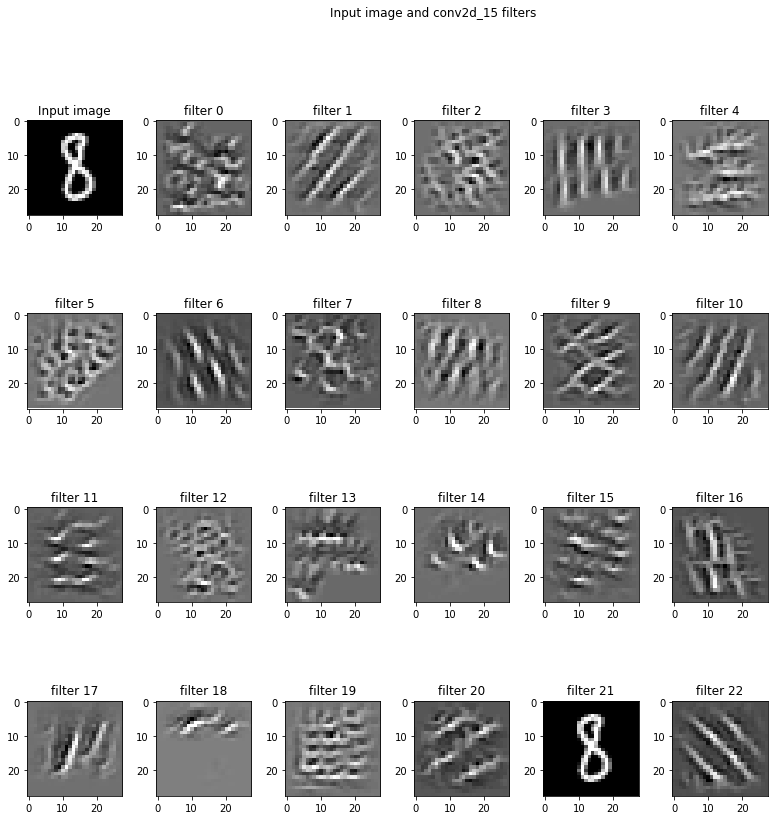

In [84]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_15'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()